## Analysis on Endangered Species in Different Parks
Goals of the project:

* find out the most populous park
* find out which park has the most unique species
* find out which types of species are most likely to be endangered
* find out which types of species are most likely found in different parks
* find out which category has the most endangered species
* find out which park has the most endangered species

In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#from scipy.stats import ttest_1samp
#from scipy.stats import ttest_ind
#from scipy.stats import f_oneway
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from scipy.stats import chi2_contingency

In [78]:
#opening file
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')
df = obs.merge(species)
print(obs.head())
print(species.head())
print(obs.columns)
print(species.columns)
print(len(obs))
print(len(species))
print(obs.scientific_name.nunique())
print(species.scientific_name.nunique())
print(df.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [50]:
# checking and testing different data, some cleanup work
#showing different descriptive variables
#see how many conservation status
#print(species.conservation_status.unique())
#print(species[species.conservation_status.notnull()])
#print(species[species.scientific_name.duplicated()].sort_values(by = 'scientific_name').head(100))
#dropping duplicates
species = species.scientific_name.drop_duplicates()
print(len(species))


5541


                             park_name  observations
1  Great Smoky Mountains National Park        431820
0                  Bryce National Park        576025
3               Yosemite National Park        863332
2            Yellowstone National Park       1443562


Text(0, 0.5, 'Observations')

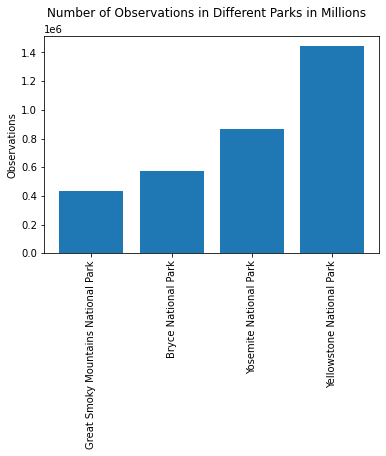

In [66]:
#find out the most populous park
#see amount in different park
#see conservation based on category,
x = obs.park_name.unique
parknameobservation = obs.groupby('park_name').observations.sum().reset_index()
parknameobservation = parknameobservation.sort_values('observations')
#plt.hist(x, y)
print(parknameobservation)
plt.bar(parknameobservation.park_name,parknameobservation.observations)
plt.xticks(rotation = 90)
plt.suptitle('Number of Observations in Different Parks in Millions')
plt.ylabel('Observations')


Text(0.5, 1.0, 'Number of unique species in each park')

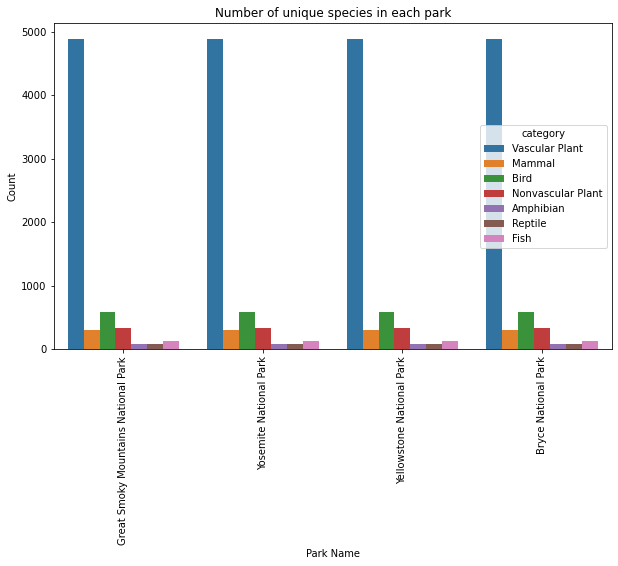

In [92]:
#group by park count category 
plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = 'park_name', y = 'observations', hue = 'category', estimator = len)
plt.xlabel('Park Name')
plt.ylabel('Count')
plt.title('Number of unique species in each park')

Text(0.5, 1.0, 'Number of unique species in each park')

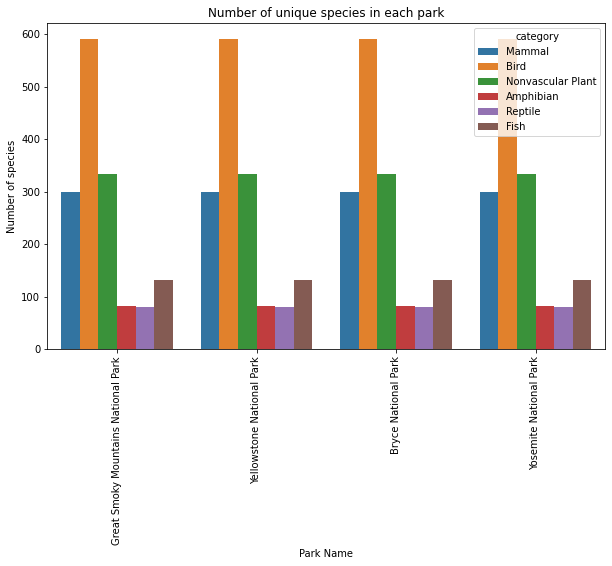

In [96]:
#making data without vascular plant
noplant = df[df.category != 'Vascular Plant']

plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
sns.barplot(data = noplant, x = 'park_name', y = 'observations', hue = 'category', estimator = len)
plt.xlabel('Park Name')
plt.ylabel('Number of species')
plt.title('Number of unique species in each park')
#sns.barplot(data=species, x="conservation_status", y="scientific_name", hue = 'category')

Text(0.5, 1.0, 'Number of observations in each park without Plants')

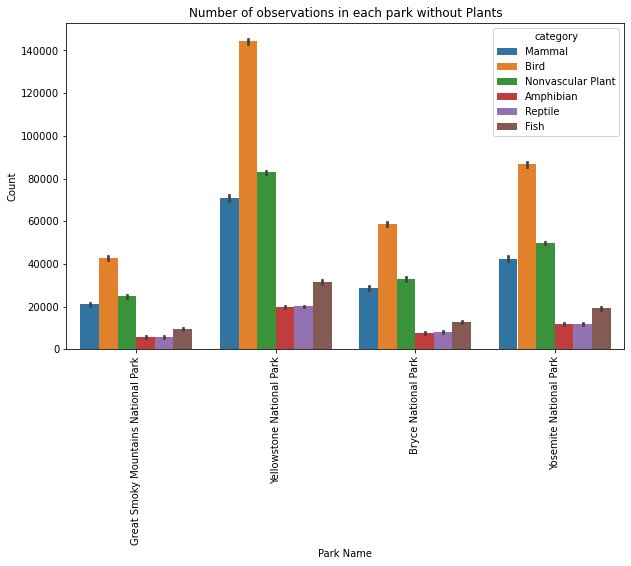

In [98]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
sns.barplot(data = noplant, x = 'park_name', y = 'observations', hue = 'category', estimator = sum)
plt.xlabel('Park Name')
plt.ylabel('Count')
plt.title('Number of observations in each park without Plants')

[None, None, None, None, None, None, None, None]

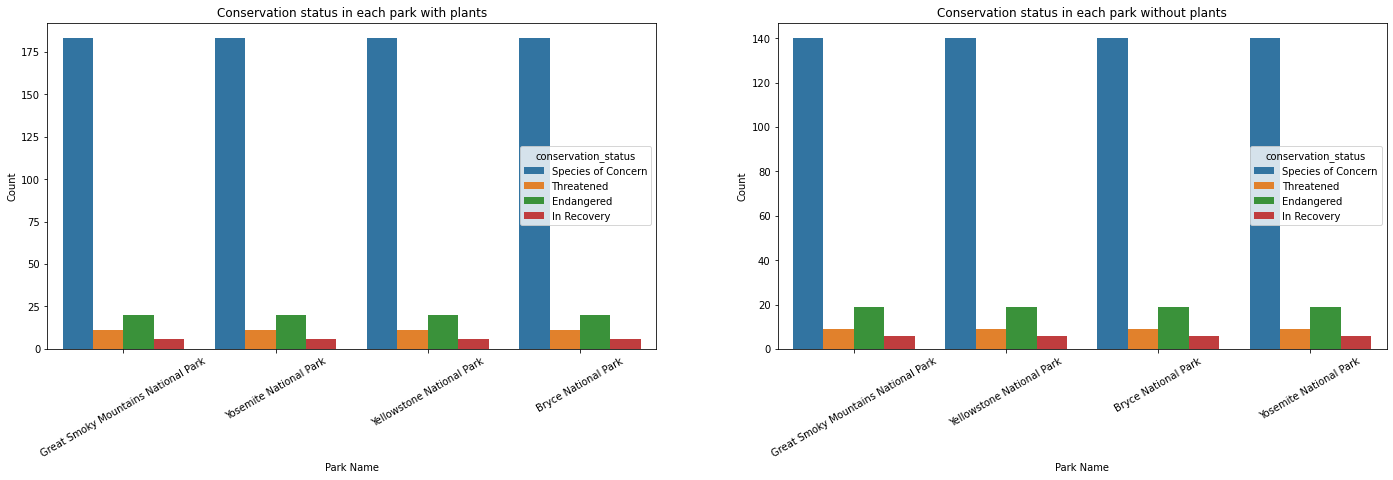

In [116]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))

sns.barplot(data = df, x = 'park_name', y = 'observations', hue = 'conservation_status', estimator = len, ax = ax1)
ax1.set_xlabel('Park Name')
ax1.set_ylabel('Count')
ax1.set_title('Conservation status in each park with plants')
sns.barplot(data = noplant, x = 'park_name', y = 'observations', hue = 'conservation_status', estimator = len, ax = ax2)

ax2.set_xlabel('Park Name')
ax2.set_ylabel('Count')
ax2.set_title('Conservation status in each park without plants')

props = {"rotation" : 30}
plt.setp(ax1.get_xticklabels(), **props)
plt.setp(ax2.get_xticklabels(), **props)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

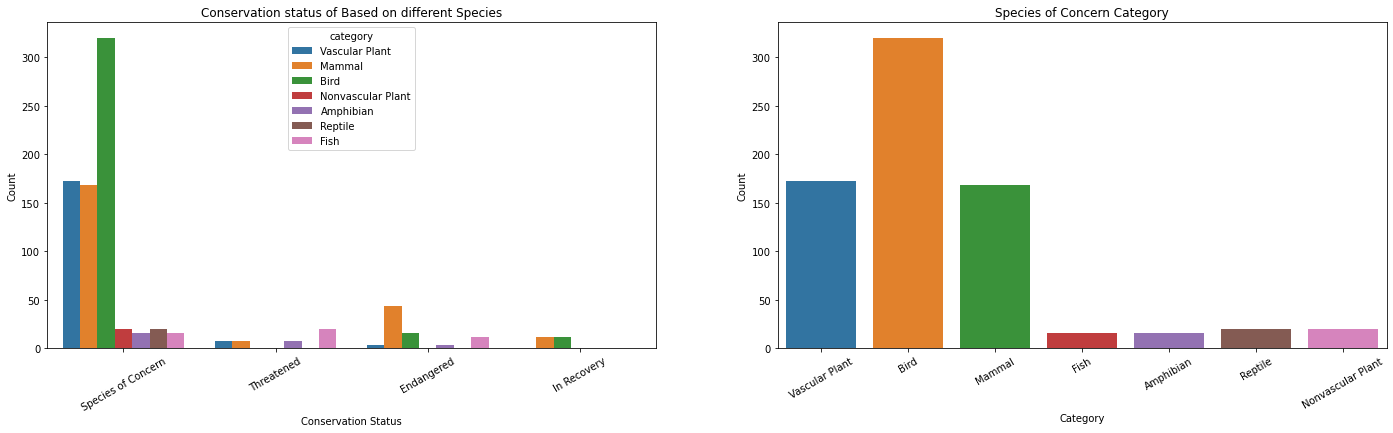

In [122]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))

sns.barplot(data = df, x = 'conservation_status', y = 'observations', hue = 'category', estimator = len, ax = ax1)
ax1.set_xlabel('Conservation Status')
ax1.set_ylabel('Count')
ax1.set_title('Conservation status of Based on different Species')

concern = df[df.conservation_status == 'Species of Concern']
sns.barplot(data = concern, x = 'category', y = 'observations', estimator = len, ax = ax2)
ax2.set_xlabel('Category')
ax2.set_ylabel('Count')
ax2.set_title('Species of Concern Category')

props = {"rotation" : 30}
plt.setp(ax1.get_xticklabels(), **props)
plt.setp(ax2.get_xticklabels(), **props)

* find out the most populous park : Yellowstone National Park
* find out which park has the most unique species: Equal
* find out which types of species are most likely to be endangered : Birds
* find out which types of species are most likely found in different parks: Vascular Plants, then mammals
* find out which category has the most endangered species: Birds
* find out which park has the most endangered species: Equal